In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
    
rcParams['xtick.labelsize'] = 20
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 1
rcParams['xtick.major.pad'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1

rcParams['ytick.labelsize'] = 20
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 1
rcParams['ytick.major.pad'] = 10
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1

rcParams['legend.fontsize'] = 16
rcParams['legend.borderaxespad'] = 1

rcParams['axes.labelsize'] = 24
rcParams['axes.titlesize'] = 24

In [3]:
blah = numpy.load('single_res_real_imag.npz')

In [5]:
imag_res = blah['imag']
real_res = blah['real']
freqs_res = blah['fs']
best_fit = blah['fit']

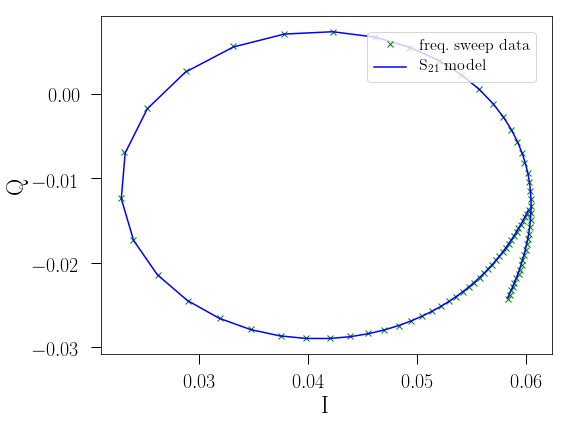

In [24]:
figure(figsize = (8,6))

plot(real_res, imag_res, 'x', color = 'g', label = '$\mathrm{freq.\ sweep\ data}$')
plot(best_fit.real, best_fit.imag, color = 'b', label = '$\mathrm{S_{21}\ model}$')

xlabel('$\mathrm{I}$')
ylabel('$\mathrm{Q}$')

legend(loc = 1)
tight_layout()

In [6]:
s21_complex = np.vectorize(complex)(real_res, imag_res)

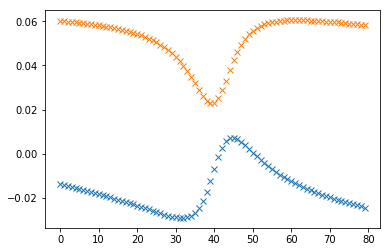

In [7]:
plot(imag_res, 'x')
plot(real_res, 'x')

In [8]:
s21_error = np.vectorize(complex)(std(real_res[:10]), std(imag_res[:10]))

In [62]:
std(real_res[:400])

0.010835467033468568

In [9]:
s21_error

array((0.0005781430526416725+0.0012950418531937405j))

In [76]:
def reduced_chi_squared(ydata, ymod, n_param=2,sd=None):
    
    if sd==None:  
            chisq=numpy.sum(((ydata-ymod) * np.conj(ydata-ymod)))  
    else:  
            chisq=numpy.sum(((ydata-ymod)/sd) * np.conj((ydata-ymod)/sd))

    nu=ydata.size-n_param
    red_chisq = chisq/nu 
    return chisq, red_chisq

In [77]:
def residuals(ydata, ymod):
    return ydata-ymod

In [78]:
reduced_chi_squared(s21_complex, best_fit, n_param=10)

((2.9071928166970838e-07+0j), (4.1531325952815485e-09+0j))

In [79]:
reduced_chi_squared(s21_complex, best_fit, n_param=10, sd=s21_error)

/Users/hlym/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


((0.14453702348129768+0j), (0.0020648146211613952+0j))

In [83]:
#try it with the errors from the residual

In [84]:
reduced_chi_squared(s21_complex, best_fit, n_param=10, sd=5e-5)

((116.28771266788337+0j), (1.6612530381126196+0j))

In [85]:
pwd

u'/Users/hlym/pton_analysis/20181228_mmbv0b-nointerface'

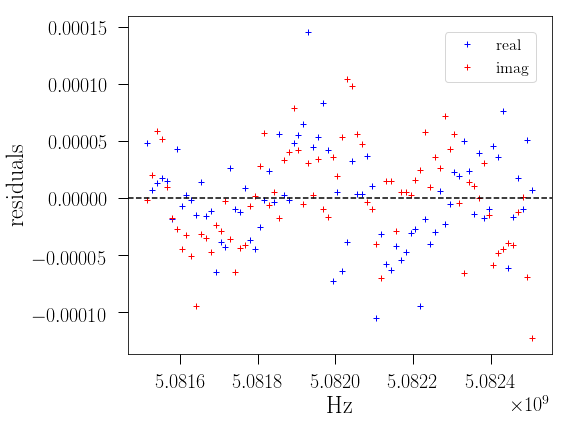

In [86]:
figure(figsize=(8,6))

resids = residuals(s21_complex, best_fit)

plot(freqs_res, np.real(resids), '+', color = 'b', label = '$\mathrm{real}$')
plot(freqs_res, np.imag(resids), '+', color = 'r', label = '$\mathrm{imag}$')

axhline(0, linestyle='--', color = 'k')

xlabel('$\mathrm{Hz}$')
ylabel('$\mathrm{residuals}$')

legend(loc = 1)
tight_layout()